## Netflix Data Analysis 
#### (with Web Scraping)

https://www.kaggle.com/datasets/shivamb/netflix-shows

In [98]:
import pandas as pd
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, date, time
import plotly.graph_objects as go
import plotly.express as px
# import scipy.stats as st
from datetime import datetime


In [2]:
df = pd.read_csv('netflix_titles.csv', index_col=False)
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [8]:
# calculate the percentage of missing values in each column

# percent_missing = df.isnull().sum().sort_values(ascending=False) * 100 / len(df)
# message = f"PERCENT MISSING IN EACH COLUMN is: \n{round(percent_missing, 2)}."
# print(message)

print("MISSING INFORMATION (NULL PERCENTAGE):")

for i in df.columns:
    null_percent = df[i].isna().sum() / len(df) * 100 
    if null_percent > 0 :
        print("{}: {}%".format(i,round(null_percent,2)))

MISSING INFORMATION (NULL PERCENTAGE):
director: 29.91%
cast: 9.37%
country: 9.44%
date_added: 0.11%
rating: 0.05%
duration: 0.03%


Missing values need to be filled or cleaned

## Cleaning - Rating

In [9]:
# check which movie titles doesn't have a rating (since it's just a few, I can fill myself)
df[df[['title', 'rating']].isna().any(axis=1)]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [10]:
df[['rating']].value_counts()

rating  
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
dtype: int64

In [11]:
# check which movie titles with ratings in time as they are incorrect (74 min, 84 min, 66 min)
filtered_df = df[df['rating'].isin(['84 min', '74 min', '66 min'])]
filtered_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [12]:
# updated_df = df.loc[df['title'] == '13TH: A Conversation with Oprah Winfrey & Ava DuVernay', 'rating'] = 'TV-PG'

Changed ratings of the following titles.
Manually changed ratings since low count of titles need to be changed. Otherwise automated method would be used.

In [13]:
# defining a dictionary of title-rating pairs to update
title_rating_dict = {'13TH: A Conversation with Oprah Winfrey & Ava DuVernay': 'TV-PG', 
                     'Gargantia on the Verdurous Planet': 'TV-14', 
                     'Little Lunch': 'TV-PG', 
                     'My Honor Was Loyalty': 'PG-13', 
                     'Louis C.K. 2017': 'TV-MA', 
                     'Louis C.K.: Hilarious': 'TV-MA', 
                     'Louis C.K.: Live at the Comedy Store': 'TV-MA'
                    }

In [14]:
# Loop over the title-rating pairs and update the 'rating' column in the dataframe

for title, rating in title_rating_dict.items():
    df.loc[df['title'] == title, 'rating'] = rating

In [15]:
# check updated df with changes
df[['rating']].value_counts()

rating  
TV-MA       3210
TV-14       2161
TV-PG        865
R            799
PG-13        491
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
dtype: int64

Now all ratings for each row entry has been filled

## Cleaning - Duration 

In [16]:
df[['duration']].value_counts()

duration 
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
97 min        146
             ... 
201 min         1
200 min         1
196 min         1
43 min          1
10 min          1
Length: 220, dtype: int64

Found durations that were misplaced in difference columns in previous section, placing it in correct column

In [17]:
# defining a dictionary of title-duration pairs to update
title_duration_dict = {'Louis C.K. 2017': '74 min', 
                     'Louis C.K.: Hilarious': '84 min', 
                     'Louis C.K.: Live at the Comedy Store': '66 min'
                    }

# Loop over the title-duration pairs, update the 'duration' column in the df
for title, duration in title_duration_dict.items():
    df.loc[df['title'] == title, 'duration'] = duration


In [18]:
# check if updated
updated_duration = df[df['title'].isin(['Louis C.K. 2017', 'Louis C.K.: Hilarious', 'Louis C.K.: Live at the Comedy Store'])]
updated_duration

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,TV-MA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,TV-MA,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,TV-MA,66 min,Movies,The comic puts his trademark hilarious/thought...


## Cleaning - Country, Date Added, Director and Cast

In [19]:
# drop NaN in date_added to netflix as it might not be easy to find and there are only 10 missing (not significant)
# drop country (will web scrape in another to get the countries of production another time)

df = df.dropna(subset=['country', 'date_added'], inplace = False)

In [20]:
# replace 'director' and 'cast' NaN with "No Data" as I want to still explore and fill the "no data" later. 

df['director'].replace(np.nan, 'No Data', inplace = True)
df['cast'].replace(np.nan, 'No Data', inplace = True)

In [21]:
df.shape

(7967, 12)

In [22]:
# check for nulls after update

df.isnull().sum().sort_values(ascending=False)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [24]:
df.shape

(7967, 12)

In [25]:
df.duplicated().sum()

0

In [26]:
df[['director']].value_counts()[:10]

director              
No Data                   2216
Raúl Campos, Jan Suter      18
Marcus Raboy                15
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Steven Spielberg            11
Don Michael Paul            10
dtype: int64

In [27]:
df[['country']].value_counts()[:10]

country       
United States     2812
India              972
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
dtype: int64

## Data Visualizations and Exploration

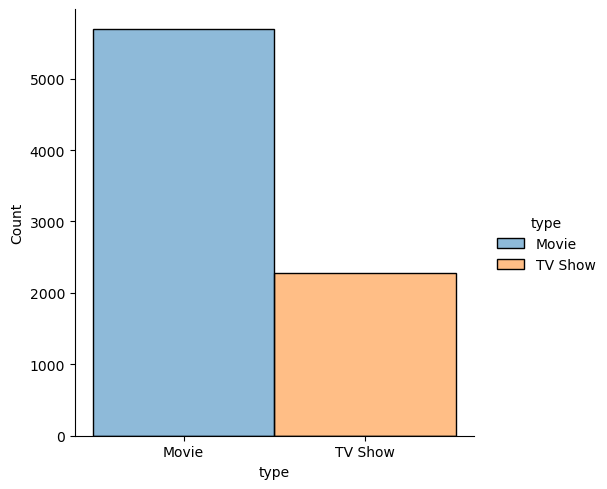

In [28]:
sns.displot(df, x="type", hue="type")

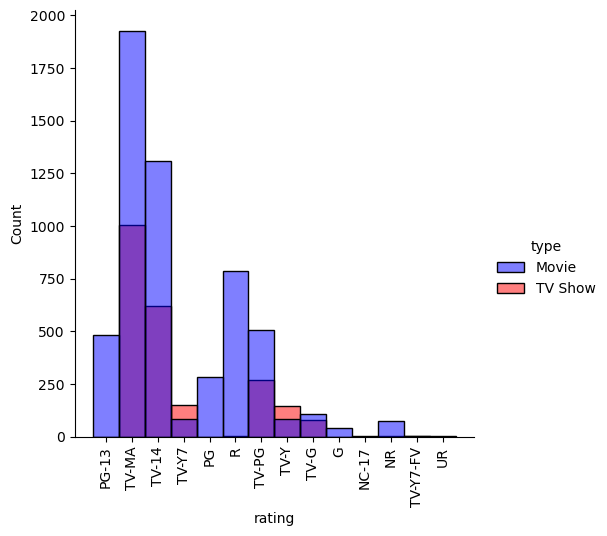

In [29]:
plot = sns.displot(df, x="rating", hue='type', palette=['blue', 'red'])
plot.set_xticklabels(rotation=90)
plot.set(xticks=range(len(df['rating'].unique())))

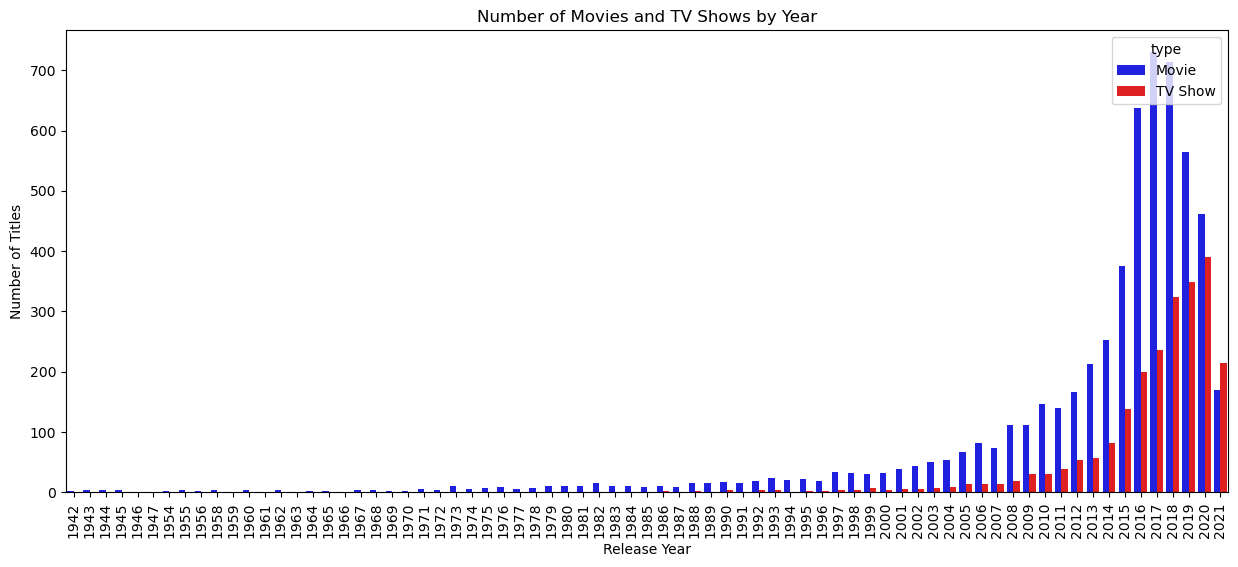

In [30]:
grouped_df = df.groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='release_year', y='show_id', hue='type', data=grouped_df, palette=['blue', 'red'], ax=ax)
ax.set_title('Number of Movies and TV Shows by Year')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Titles')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Based on the graph, there were more movies added between 2015-2017, while there were more TV shows added on Netflix between the years 2018-2020. 

## Display of Films and TV Shows in Geospatial Format

/var/folders/7g/kpw1gjw539l9x_wr2fw8njj80000gn/T/ipykernel_97226/2326809588.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


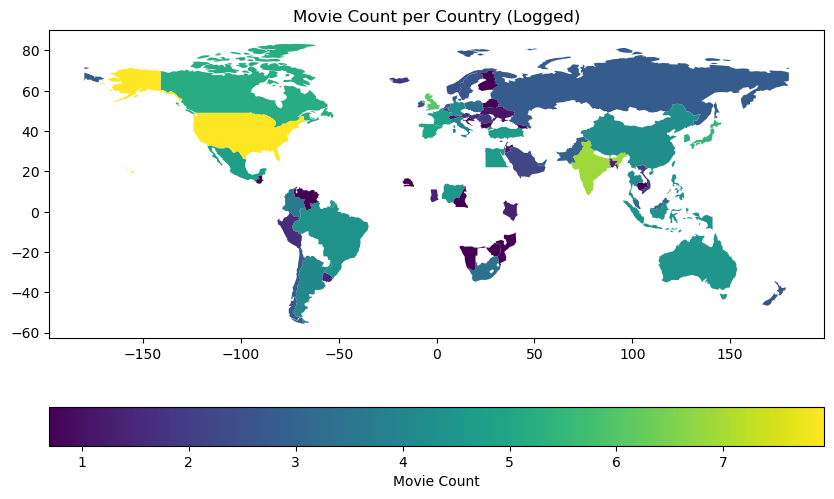

In [31]:
# geospatial analysis
import geopandas as gpd
from matplotlib import cm

# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a new df with the count of titles by country
country_count = df['country'].value_counts()
country_count.head()

# Convert the grouped Series back to a df
country_count = country_count.reset_index()
country_count.columns = ['country', 'count']

# Change USA name since Geopandas stores as 'United States of America'
country_count.loc[country_count['country'] == 'United States', 'country'] = 'United States of America'

# Merge the data with the world GeoDataFrame based on country names
merged = world.merge(country_count, left_on='name', right_on='country')

# logarithmic scale to counts
merged['log_count'] = np.log1p(merged['count'])

color_map = cm.get_cmap('viridis')  # Change 'viridis' to your desired colormap

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column='log_count', ax=ax, cmap=color_map, legend=True,
            legend_kwds={'label': "Movie Count", 'orientation': "horizontal"})
ax.set_title("Movie Count per Country (Logged)")
plt.show()

In [32]:
# top ten countries produced
sort_country_cnt = country_count.sort_values(by='count', ascending=False)[:10]
sort_country_cnt

,country,count
0,United States of America,2812
1,India,972
2,United Kingdom,418
3,Japan,244
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


## Further Breakdown of Movies / TV Shows by Country

Some movie/TV shows seem to be produced by multiple countries. We'll separate them as distinct string values in each row below.

In [33]:
sort_country_cnt = country_count.sort_values(by='count', ascending=False)
sort_country_cnt.head()

,country,count
0,United States of America,2812
1,India,972
2,United Kingdom,418
3,Japan,244
4,South Korea,199


In [34]:
import collections

# count the number of distinct string values in each row
df['country'] = df['country'].str.strip().str.lower()
counts = df['country'].str.split(',').explode().str.strip().value_counts()

# create a new df with the counts
counts_df = pd.DataFrame({'value': counts.index, 'count': counts.values})
 
counts_df.head(20)

,value,count
0,united states,3684
1,india,1046
2,united kingdom,805
3,canada,445
4,france,393
5,japan,317
6,spain,232
7,south korea,231
8,germany,226
9,mexico,169


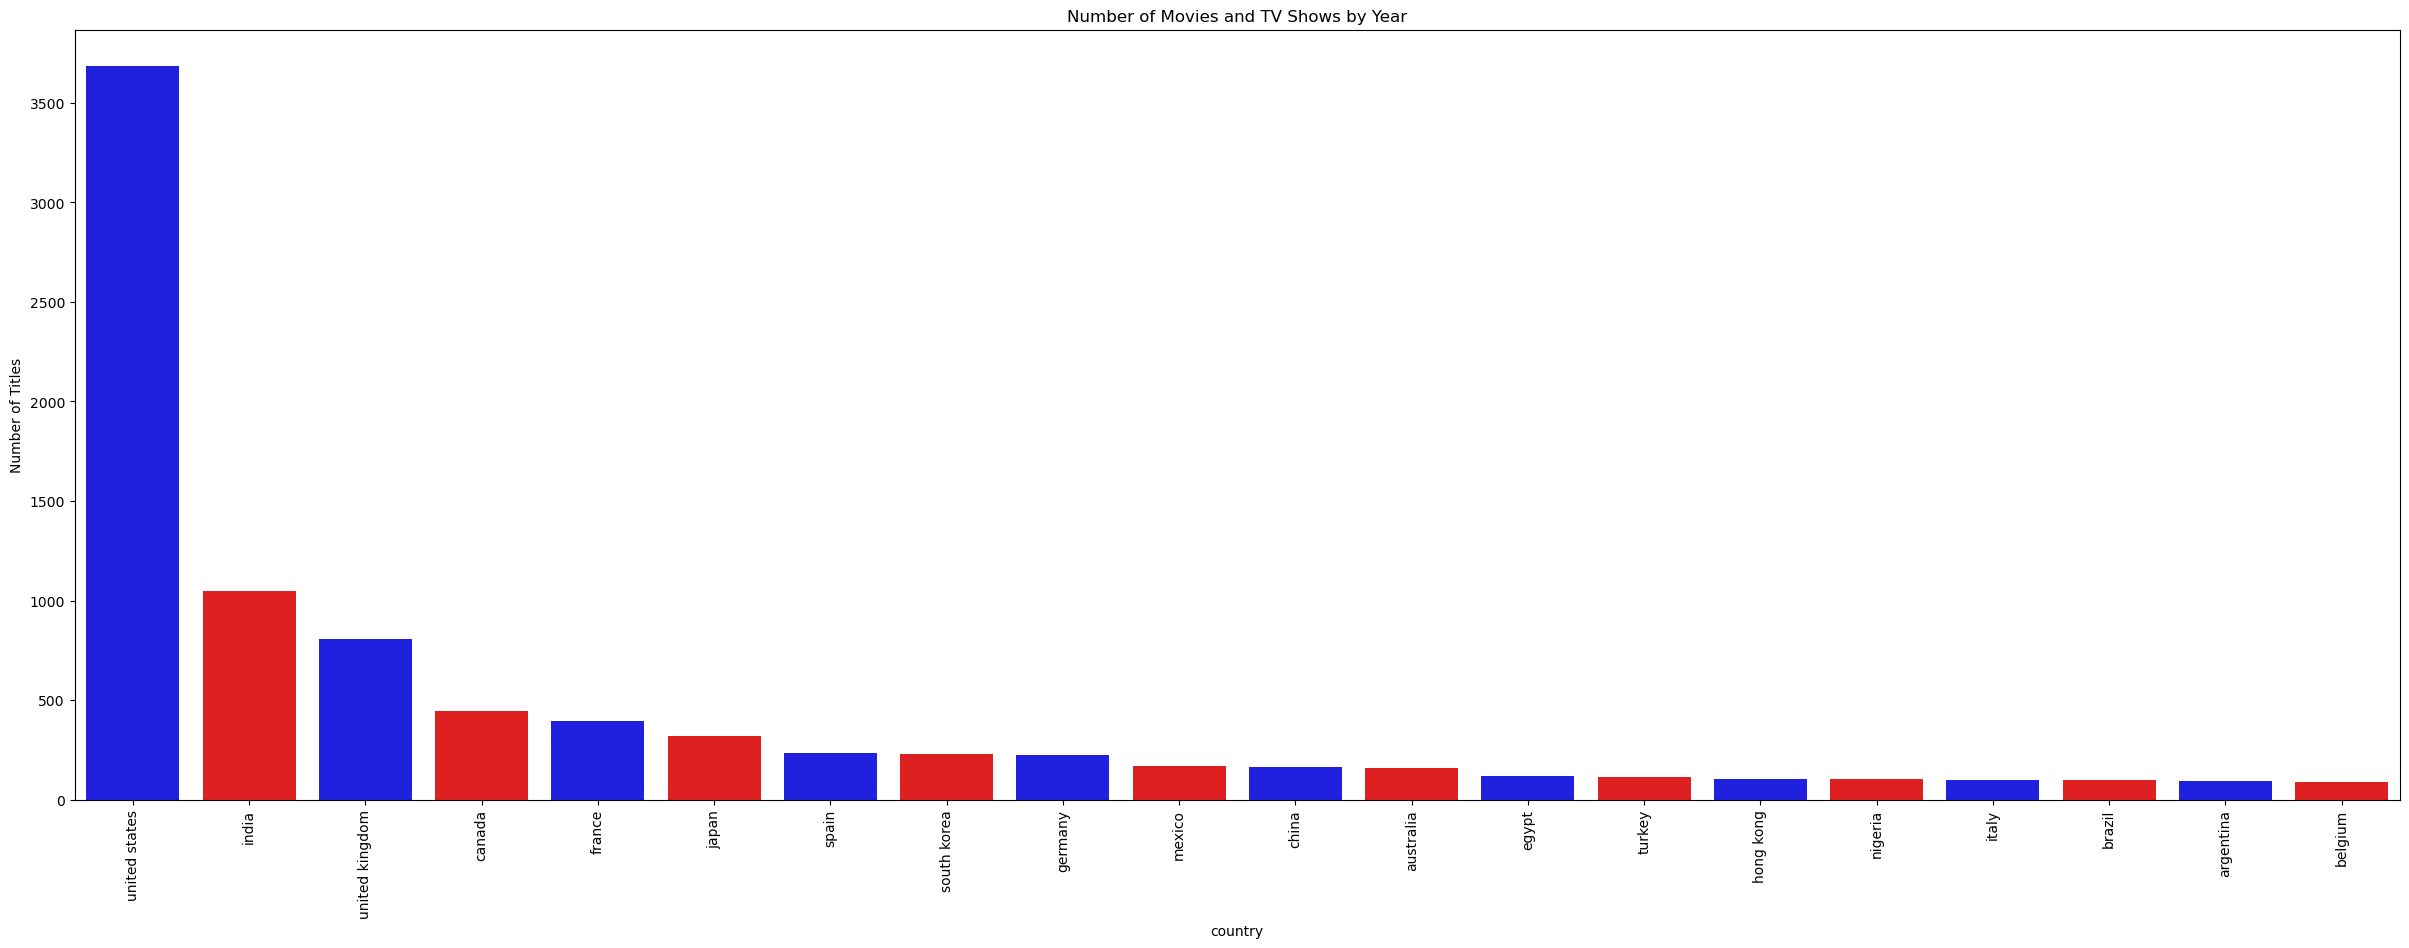

In [35]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x='value', y='count', data=counts_df.head(20), palette=['blue', 'red'], ax=ax)
ax.set_title('Number of Movies and TV Shows by Year')
ax.set_xlabel('country')
ax.set_ylabel('Number of Titles')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

After splitting the countries to its own distinct value, countries such as United States, India, and United Kingdom remained as the top 3 countries to have produced movies/TV shows. However, Japan and South Korea has fallen further behind because other countries, such as Canada, have produced other movies/TV-shows in collaboration with other countries. Perhaps this means that countries such as Japan and South Korea does not have as much collaboration with other countries in this specific dataset. 


## Further Exploration - Month of Movies/TV-Shows Added on Netflix

In [36]:
df['date_added'].isnull().sum()

0

Locate the rows where there are NaNs in 'date_added':

In [37]:
# boolean mask for missing values
missing_mask = df['date_added'].isnull()

# Filter the df to show only rows with missing values
missing_rows = df[missing_mask]

display(missing_rows)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [38]:
# month of which content was added -- number of movies and shows added per month 

# Convert "date_added" column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Create a new "month" column while handling NaT values and create a new column "month_added"
df['month_added'] = np.where(df['date_added'].isnull(), pd.NA, df['date_added'].dt.month)

# Group the data by month_added and count the number of movies and shows added per month
monthly_counts = df.groupby('month_added').size().reset_index(name='count')


In [39]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,united states,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",india,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","united states, ghana, burkina faso, united kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",united kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",united states,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","germany, czech republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9
15,s16,TV Show,Dear White People,No Data,"Logan Browning, Brandon P. Bell, DeRon Horton,...",united states,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,9
17,s18,TV Show,Falsa identidad,No Data,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",mexico,2021-09-22,2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,9
21,s22,TV Show,Resurrection: Ertugrul,No Data,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",turkey,2021-09-22,2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,9


In [40]:
movie_monthly_counts = df.groupby(['type', 'month_added'])['month_added'].count()
movie_monthly_counts = movie_monthly_counts.reset_index(name='count')
movie_monthly_counts['month_added'] = movie_monthly_counts['month_added'].astype(int)

print(movie_monthly_counts)

       type  month_added  count
0     Movie            1    527
1     Movie            2    372
2     Movie            3    503
3     Movie            4    512
4     Movie            5    392
5     Movie            6    443
6     Movie            7    490
7     Movie            8    472
8     Movie            9    461
9     Movie           10    518
10    Movie           11    483
11    Movie           12    518
12  TV Show            1    174
13  TV Show            2    169
14  TV Show            3    183
15  TV Show            4    182
16  TV Show            5    153
17  TV Show            6    190
18  TV Show            7    218
19  TV Show            8    195
20  TV Show            9    200
21  TV Show           10    183
22  TV Show           11    188
23  TV Show           12    241


In [ ]:
# Create a separate plot for each movie type
for movie_type in movie_monthly_counts['type'].unique():
    # Filter the data for the current movie type
    movie_type_data = movie_monthly_counts[movie_monthly_counts['type'] == movie_type]
    
    # Plot the monthly counts for the current movie type
    plt.plot(movie_type_data['month_added'], movie_type_data['count'], label=movie_type)

# Add labels and title to the plot
plt.xlabel('Month Added')
plt.ylabel('Count')
plt.title('Monthly Counts of Movies and TV Shows by Type')
plt.legend()
plt.xticks(range(min(movie_monthly_counts['month_added']), max(movie_monthly_counts['month_added'])+1, 1))
plt.show()

There seems to be more releases of movies during the holiday periods (February-March spring break, May to July summer break, and perhaps November-December for winter break).

## Further Exploration - Type of Content Produced Over the Years


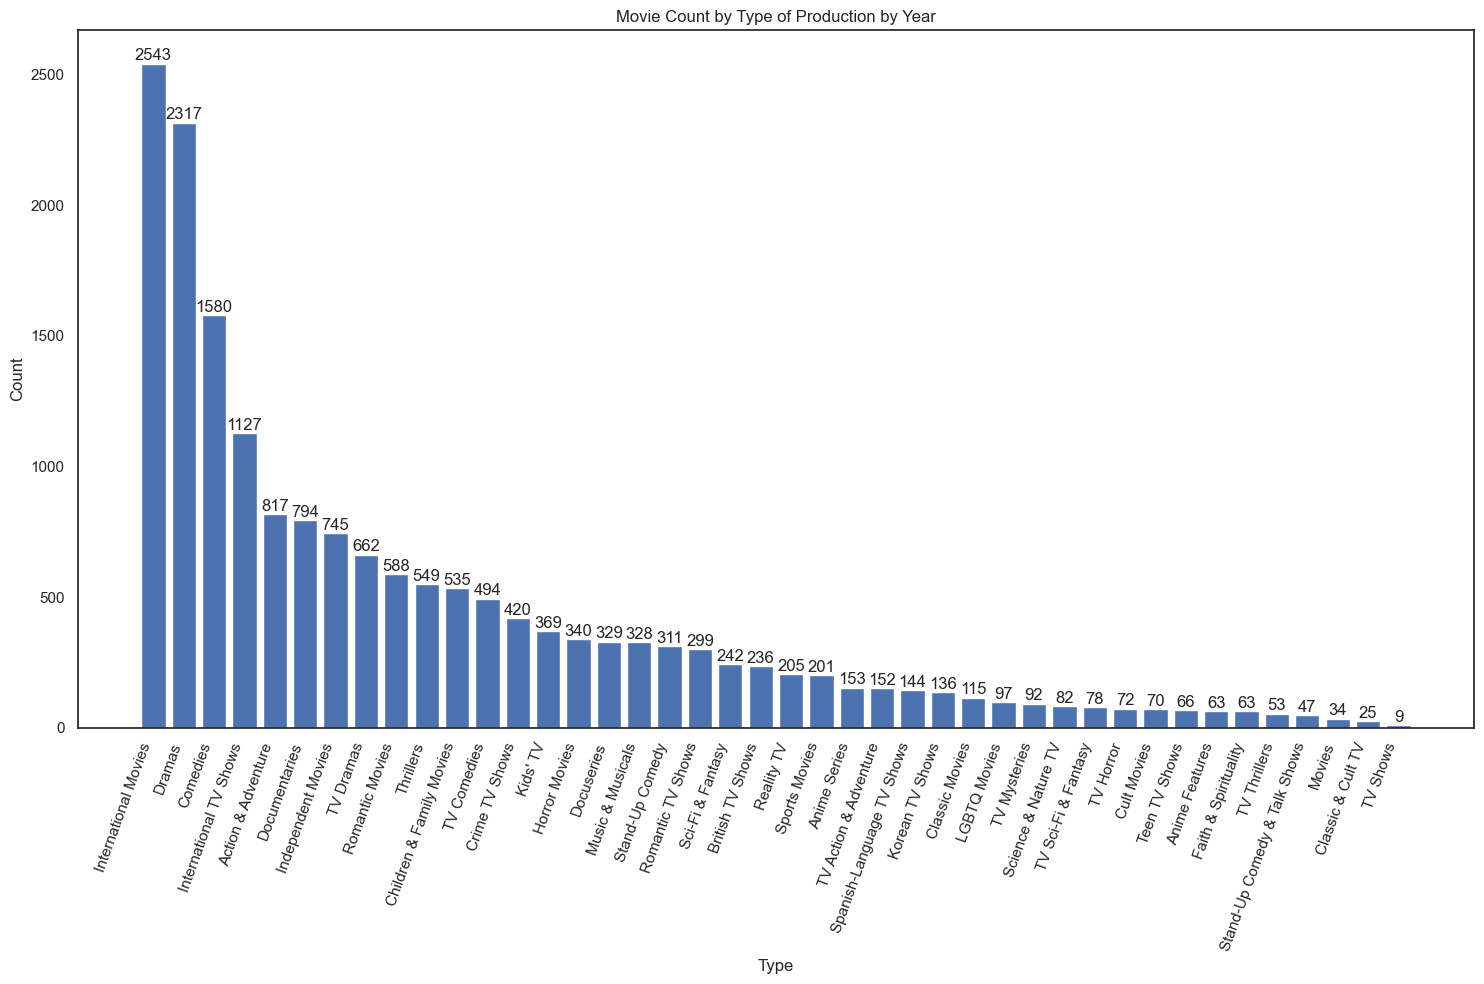

In [42]:
# Create new df to store the separated types and their counts
type_counts = pd.DataFrame(df['listed_in'].str.split(', ').explode().value_counts())

type_counts = type_counts.reset_index().rename(columns={'index': 'Type', 'listed_in': 'Count'})
type_counts = type_counts.sort_values('Count', ascending=False)

sns.set(style="white")
plt.figure(figsize=(15, 10))
plt.bar(type_counts['Type'], type_counts['Count'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Movie Count by Type of Production by Year')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()

# label count
for i, count in enumerate(type_counts['Count']):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')
    
plt.show()

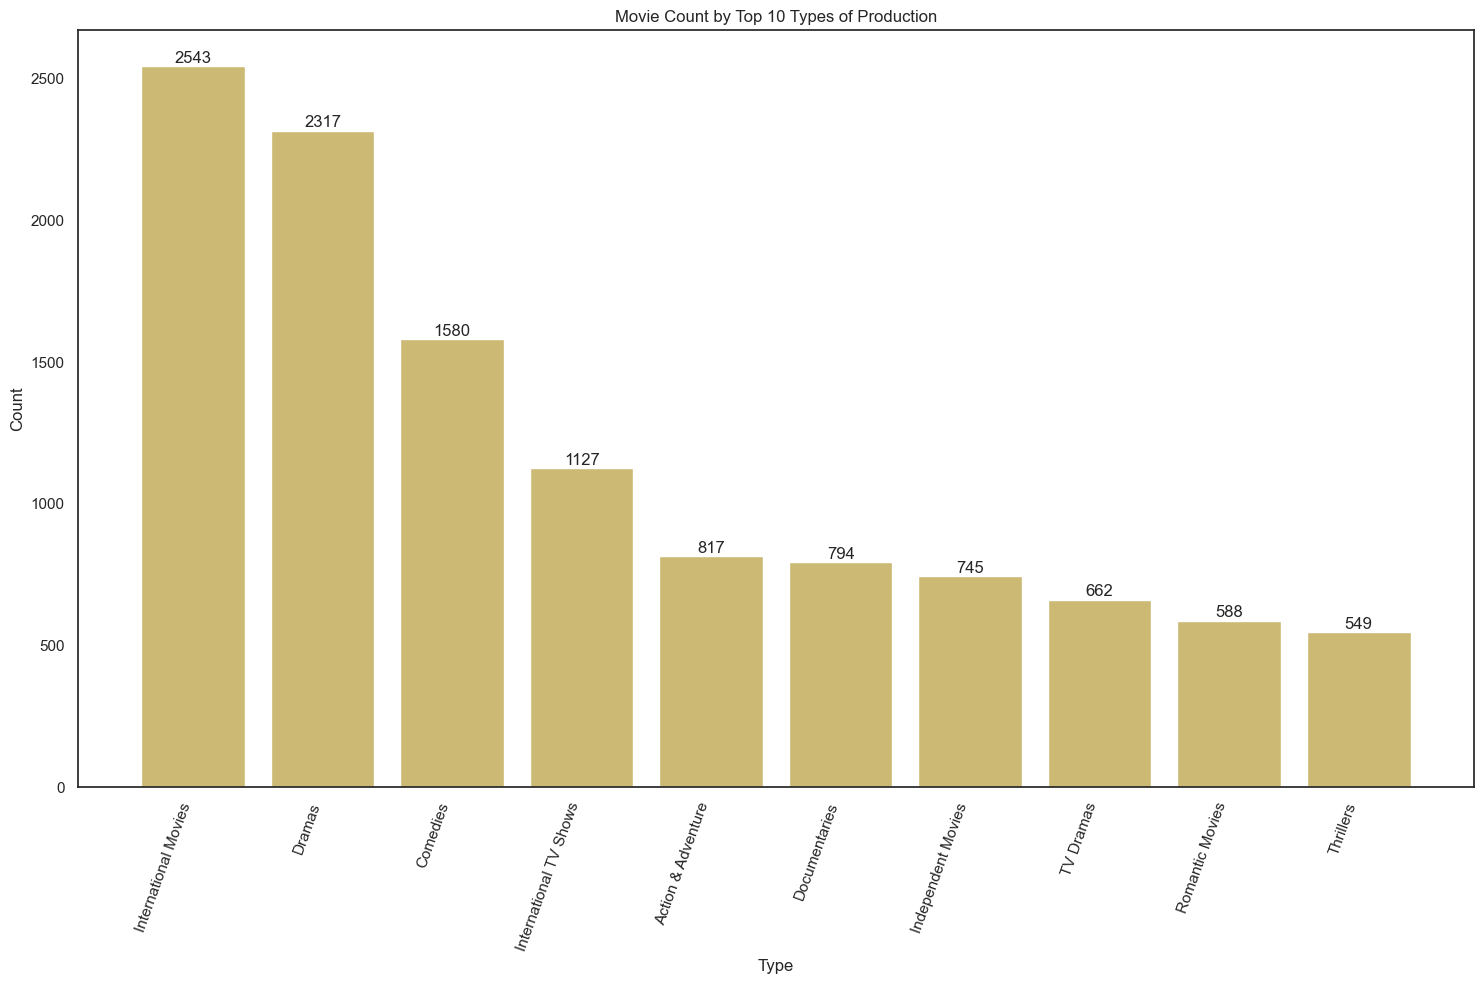

In [43]:
# Type of content produced over years

# Create a new df to store the separated types and their counts
type_counts = pd.DataFrame(df['listed_in'].str.split(', ').explode().value_counts())
type_counts = type_counts.reset_index().rename(columns={'index': 'Type', 'listed_in': 'Count'})
type_counts = type_counts.sort_values('Count', ascending=False)[:10]

# Plot counts for each type of production
sns.set(style="white")

plt.figure(figsize=(15, 10))
plt.bar(type_counts['Type'], type_counts['Count'], color = 'y')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Movie Count by Top 10 Types of Production')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()

# label count
for i, count in enumerate(type_counts['Count']):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')
    
plt.show()

It appears that there are more production of International Movies as opposed to Thrillers.

## Further Exploration - Cast Analysis

In [44]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,united states,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",india,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","united states, ghana, burkina faso, united kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",united kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9


In [45]:
# Count of number of 'No Data' available for 'cast'

nan_cast = (df['cast'] == 'No Data').sum()
nan_cast
cast_msg = f"Number of 'No Data' in 'Cast'is {nan_cast}."
print(cast_msg)

Number of 'No Data' in 'Cast'is 671.


In [46]:
# there was an value error prior because of the $ character in the string
specific_cast = df[df['cast'].str.contains('Joey Bada\\$', na=False)]
display(specific_cast)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
1089,s1090,Movie,Two Distant Strangers,"Travon Free, Martin Desmond Roe","Joey Bada$$, Andrew Howard, Zaria",united states,2021-04-09,2021,TV-MA,32 min,Dramas,"In this Oscar-nominated short film, a man tryi...",4


In [47]:
# replace the character with alphabetical letter

# df['cast'] = df['cast'].str.replace('Joey Bada\\$', 'Joey Badass')
df['cast'] = df['cast'].str.replace(r'Bada\$\$', 'Badass')


/var/folders/7g/kpw1gjw539l9x_wr2fw8njj80000gn/T/ipykernel_97226/1182364995.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cast'] = df['cast'].str.replace(r'Bada\$\$', 'Badass')


In [48]:
# verify replacement done 

word = 'Joey Badass'
verify_word = df[df['cast'].str.contains(word, na=False)]
display(verify_word)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
1089,s1090,Movie,Two Distant Strangers,"Travon Free, Martin Desmond Roe","Joey Badass, Andrew Howard, Zaria",united states,2021-04-09,2021,TV-MA,32 min,Dramas,"In this Oscar-nominated short film, a man tryi...",4


In [49]:
df['cast'] = df['cast'].str.replace(r'Bada\$\$', 'Badass')
print(repr(df['cast'].iloc[0]))

'No Data'


/var/folders/7g/kpw1gjw539l9x_wr2fw8njj80000gn/T/ipykernel_97226/98181050.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cast'] = df['cast'].str.replace(r'Bada\$\$', 'Badass')


In [50]:
import re

def check_non_alphabetical(df, column_name):
    non_alphabetical_rows = df[df[column_name].str.contains(r'[^A-Za-z\s,]', na=False)]
    return non_alphabetical_rows

#specify olumn to check for non-alphabetical characters within names
column_name = 'cast'

#call function to check for non-alphabetical characters within names in the specified column
result = check_non_alphabetical(df, column_name)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(result['cast'][:10])


/var/folders/7g/kpw1gjw539l9x_wr2fw8njj80000gn/T/ipykernel_97226/3296825758.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  display(result['cast'][:10])


1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...
15    Logan Browning, Brandon P. Bell, DeRon Horton,...
17    Luis Ernesto Franco, Camila Sodi, Sergio Goyri...
21    Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...
28    Keri Russell, Josh Hamilton, J.K. Simmons, Dak...
32    Asa Butterfield, Gillian Anderson, Ncuti Gatwa...
37    Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...
43    Dennis Quaid, Bess Armstrong, Simon MacCorkind...
Name: cast, dtype: object

In [51]:
def check_non_alphabetical(df, column_name):
    pattern = re.compile(r'[^A-Za-z,]')
    non_alphabetical_rows = df[df[column_name].str.contains(pattern, na=False)]
    return non_alphabetical_rows

# specify the column to check for non-alphabetical characters
column_name = 'cast'

result = check_non_alphabetical(df, column_name)
result.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,united states,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",india,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","united states, ghana, burkina faso, united kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",united kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9


In the above, the goal was to clean up special characters (e.g. $).

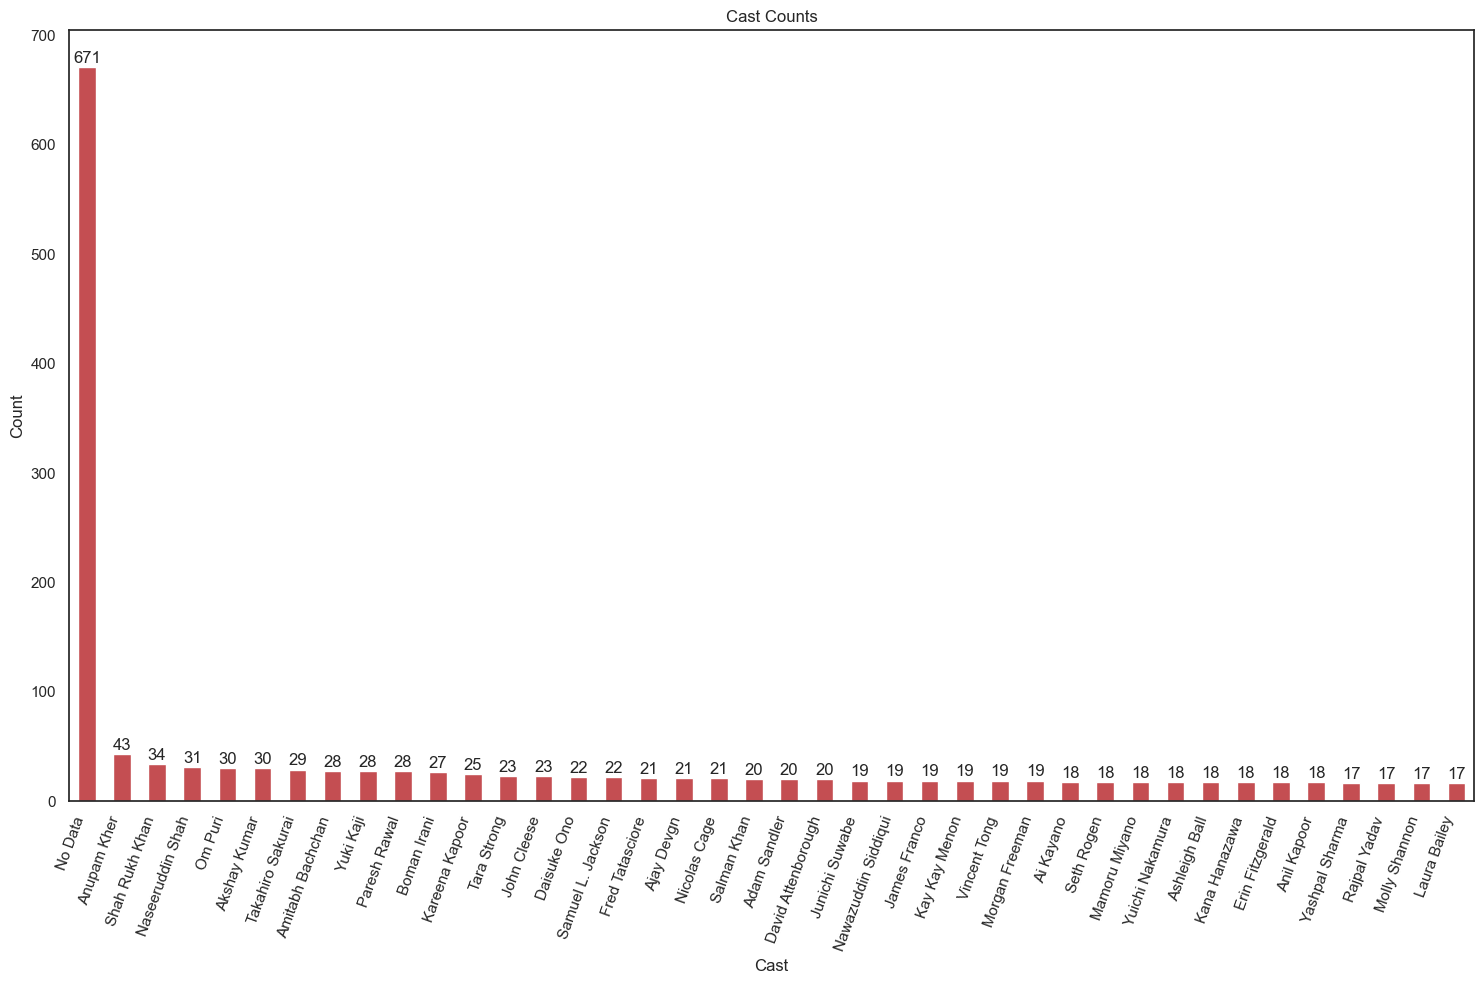

In [52]:
# Split the 'cast' column and count occurrences of each cast member
cast_counts = df['cast'].str.split(', ').explode().value_counts()

cast_counts = cast_counts.sort_values(ascending=False)[:40]

plt.figure(figsize=(15, 10))
cast_counts.plot(kind='bar', color = 'r')
plt.xlabel('Cast')
plt.ylabel('Count')
plt.title('Cast Counts')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()

# label count
for i, count in enumerate(cast_counts.values):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')
plt.show()

In [53]:
cast_counts.head()

No Data             671
Anupam Kher          43
Shah Rukh Khan       34
Naseeruddin Shah     31
Om Puri              30
Name: cast, dtype: int64

In [54]:
cast_name = "Antti Pääkkönen"
target_cast_apps = cast_counts[cast_counts==cast_name].index.values
print(target_cast_apps)

[]


In [55]:
# additional verification: check how many times a particular name is being mentioned in cast

# Specify the particular name to count
name_to_count = 'Antti Pääkkönen'

# Count the occurrences of the particular name in 'cast' column
name_count = df['cast'].str.count(name_to_count).sum()

print("Occurrences of '{}': {}".format(name_to_count, name_count))

Occurrences of 'Antti Pääkkönen': 1


Although in a few blocks above, the special characters were cleaned up, however, there are some letters of a different language (e.g. Finnish) that are present. 

---

## Web scrape for directors

In [56]:
no_data_directors_df = df[df['director'] == 'No Data']
no_data_directors_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",india,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9
15,s16,TV Show,Dear White People,No Data,"Logan Browning, Brandon P. Bell, DeRon Horton,...",united states,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,9
17,s18,TV Show,Falsa identidad,No Data,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",mexico,2021-09-22,2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,9
21,s22,TV Show,Resurrection: Ertugrul,No Data,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",turkey,2021-09-22,2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,9


In [57]:
no_data_directors_df.shape

(2216, 13)

In [58]:
no_data_directors_df = df[df['director'] == 'No Data']
count_no_data_orig = (no_data_directors_df['director'] == 'No Data').sum()
message_orig = f"BEFORE Web Scraping, the number of Null in 'Director' is: {count_no_data_orig}."
print(message_orig)

BEFORE Web Scraping, the number of Null in 'Director' is: 2216.


In [59]:
import requests
from bs4 import BeautifulSoup

def get_director_info(movie_title):
    '''Function to scrape the web and retrieve director information from Wikipedia'''
    
    url = f'https://en.wikipedia.org/wiki/{movie_title.replace(" ", "_")}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the director information
    director = soup.find('th', string='Directed by')
    if director:
        return director.find_next('td').text.strip()
    
    return None

# Iterate over the df and replace "No Data" with director information from Wikipedia
for index, row in df.iterrows():
    if row['director'] == 'No Data':
        movie_title = row['title']
        director_info = get_director_info(movie_title)
        if director_info:
            df.at[index, 'director'] = director_info

# Display the updated df
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,united states,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
4,s5,TV Show,Kota Factory,Raghav Subbu,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",india,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","united states, ghana, burkina faso, united kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",united kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9


In [60]:
no_data_directors_after_df = df[df['director'] == 'No Data']
no_data_directors_after_df.shape

(1535, 13)

In [61]:
count_no_data_after = (no_data_directors_after_df['director'] == 'No Data').sum()
count_no_data_after

1535

In [62]:
message_original = f"original: {count_no_data_orig} (No Data) in 'director'."
message_after = f"after web scraping: {count_no_data_after} (No Data) in 'director'."
print(message_original)
print(message_after)

original: 2216 (No Data) in 'director'.
after web scraping: 1535 (No Data) in 'director'.


In [63]:
no_data_directors_df = df[df['director'] == 'No Data']
no_data_directors_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
32,s33,TV Show,Sex Education,No Data,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",united kingdom,2021-09-17,2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...,9
37,s38,TV Show,Angry Birds,No Data,"Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...",finland,2021-09-16,2018,TV-Y7,1 Season,"Kids' TV, TV Comedies","Birds Red, Chuck and their feathered friends h...",9
40,s41,TV Show,He-Man and the Masters of the Universe,No Data,"Yuri Lowenthal, Kimberly Brooks, Antony Del Ri...",united states,2021-09-16,2021,TV-Y7,1 Season,"Kids' TV, TV Sci-Fi & Fantasy",Mighty teen Adam and his heroic squad of misfi...,9
49,s50,TV Show,Castle and Castle,No Data,"Richard Mofe-Damijo, Dakore Akande, Bimbo Manu...",nigeria,2021-09-15,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas","A pair of high-powered, successful lawyers fin...",9


**Note**: Based on before and after results of web scraping, 681 directors got filled. We still have 1535 directors missing.

### *** To compare changes between before and after scraping the web for director names:

In [64]:
# creating a mask to identify rows with changes
changes_mask = (no_data_directors_df['director'] == 'No Data') & (df['director'] != 'No Data')

changes_df = df[changes_mask]
print(changes_df)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, month_added]
Index: []


### *** scrape more from IMDb?

In [65]:
from imdb import IMDb

# create instance of the IMDb class
ia = IMDb()

def get_director_info(movie_title):
    try:
        # search by title
        search_results = ia.search_movie(movie_title)
        if search_results:
            # get the first result (most relevant)
            movie = search_results[0]
            ia.update(movie, info=['main'])
            
            # get director information
            if 'director' in movie:
                directors = [director['name'] for director in movie['director']]
                return ', '.join(directors)
    except Exception as e:
        print(f"An error occurred: {e}")
    
    return None

# iterate over df, replace "No Data" with director information from IMDb
for index, row in df.iterrows():
    if row['director'] == 'No Data':
        movie_title = row['title']
        director_info = get_director_info(movie_title)
        if director_info:
            df.at[index, 'director'] = director_info

display(df.head())


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,united states,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
4,s5,TV Show,Kota Factory,Raghav Subbu,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",india,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","united states, ghana, burkina faso, united kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",united kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9


In [66]:
scrape_idmb = df[df['director'] == 'No Data']
scrape_idmb.shape

(1252, 13)

In [67]:
scrape_idmb_df = (scrape_idmb['director'] == 'No Data').sum()
scrape_idmb_df

1252

In [68]:
message_original = f"original: {count_no_data_orig} (No Data) in 'director'."
message_wiki_after = f"after web scraping Wikipedia: {count_no_data_after} (No Data) in 'director'."
message_idmb_after = f"after web scraping using IDMb: {scrape_idmb_df} (No Data) in 'director'."
print(message_original)
print(message_wiki_after)
print(message_idmb_after)

original: 2216 (No Data) in 'director'.
after web scraping Wikipedia: 1535 (No Data) in 'director'.
after web scraping using IDMb: 1252 (No Data) in 'director'.


In [69]:
NA_directors = 1250
total_entries = 8870

percentage = round((NA_directors / total_entries) * 100, 1)
percentage_message = f"There is {percentage} of missing values in 'director'."
percentage_message

"There is 14.1 of missing values in 'director'."

After further web scraping IDMb for director names, another 285 director names were found and filled. For the purpose of the efficiency of the project and that the amount of missing values for directors is a little over 10%, the remaining empty entries ('No Data') will be dropped. Should there be time in the future, this can be revisited to fill the missing values a bit more.

----

## Web scrape for actors

In [70]:
no_data_cast_df = df[df['cast'] == 'No Data']
no_data_cast_df.shape

(671, 13)

In [71]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,united states,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
4,s5,TV Show,Kota Factory,Raghav Subbu,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",india,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","united states, ghana, burkina faso, united kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",united kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9


### Web scraping for actors using IDMb

In [72]:
import requests
from bs4 import BeautifulSoup

def get_cast_imdb(movie_title):
    '''Function to scrape the web and retrieve actor information'''
    
    url = f'https://www.imdb.com/find?q={movie_title}&s=tt&ttype=ft'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    result = soup.find('td', class_='result_text')
    if result:
        # extract the link to the movie's page
        movie_link = result.find('a')['href']
        
        # movie's page
        movie_url = f'https://www.imdb.com{movie_link}'
        movie_response = requests.get(movie_url)
        movie_soup = BeautifulSoup(movie_response.text, 'html.parser')
        
        # cast information
        cast_container = movie_soup.find('table', class_='cast_list')
        if cast_container:
            actors = cast_container.find_all('span', class_='itemprop', itemprop='name')
            return [actor.text.strip() for actor in actors]
    
    return None

for index, row in df.iterrows():
    if row['cast'] == 'No Data':
        movie_title = row['title']
        actor_info = get_cast_imdb(movie_title)
        if actor_info:
            df.at[index, 'cast'] = ', '.join(actor_info)

display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,united states,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
4,s5,TV Show,Kota Factory,Raghav Subbu,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",india,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","united states, ghana, burkina faso, united kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",united kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9


In [73]:
no_data_cast_df_idmb = df[df['cast'] == 'No Data']
no_data_cast_df_idmb.shape

(671, 13)

In [74]:
def get_cast_wikipedia(title):
    url = f"https://en.wikipedia.org/wiki/{title.replace(' ', '_')}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    cast_table = soup.find('table', class_='infobox')
    if cast_table:
        rows = cast_table.find_all('tr')
        for row in rows:
            header = row.find('th')
            if header and 'Starring' in header.get_text():
                cast_cells = row.find_all('td')
                if cast_cells:
                    cast_list = [actor.get_text(strip=True) for actor in cast_cells[0].find_all('a')]
                    return ', '.join(cast_list)
    return None

for index, row in df.iterrows():
    if row['cast'] == 'No Data':
        movie_title = row['title']
        actor_info = get_cast_wikipedia(movie_title)
        if actor_info:
            df.at[index, 'cast'] = actor_info

display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,united states,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
4,s5,TV Show,Kota Factory,Raghav Subbu,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",india,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","united states, ghana, burkina faso, united kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",united kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9


In [75]:
no_data_cast_df_wiki = df[df['cast'] == 'No Data']
no_data_cast_df_wiki.shape

(598, 13)

In [76]:
# no_data_present = (df == 'No Data').any()
# no_data_present

# # if no_data_present:
# #     print("There are 'No Data' values in the DataFrame.")
# # else:
# #     print("There are no 'No Data' values in the DataFrame.")

In [77]:
# convert the df into a boolean df where each cell is True if it contains "No Data"
no_data_boolean = df.applymap(lambda x: x == 'No Data')

# count the True values ('No Data' values) in each column
no_data_count = no_data_boolean.sum()

print("Number of 'No Data' values in each column:")
print(no_data_count)

Number of 'No Data' values in each column:
show_id            0
type               0
title              0
director        1252
cast             598
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
month_added        0
dtype: int64


In [78]:
df.to_csv('Netflix_Data_Cleaned.csv', index=False)

### Convert all "No Data" to NaN and then drop

In [79]:
# # Convert "No Data" to NaN 
# df['director'] = df['director'].replace('No Data', pd.NA)
# df['cast'] = df['cast'].replace('No Data', pd.NA)

# # # Drop rows with NaN values in the 'director' and 'cast' columns
# # df_cleaned = df.dropna(subset=['director', 'cast'])

# print(df)

# # df_cleaned.to_csv('Netflix_Data_Cleaned.csv', index=False)

In [80]:
# convert "No Data" to NaN using numpy.nan because in the previous line, I had an error
df['director'] = df['director'].replace('No Data', np.nan)
df['cast'] = df['cast'].replace('No Data', np.nan)

# Drop rows with NaN 
df_cleaned = df.dropna(subset=['director', 'cast'])

df_cleaned.to_csv('cleaned_data.csv', index=False)

In [81]:
df_cleaned.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
dtype: int64

In [82]:
# # Compare before (Netflix_Data_Cleaned.csv) and after (cleaned_data.csv) dropping NaN

# # Load the original Netflix dataset with "No Data"
# netflix_data_cleaned = pd.read_csv("Netflix_Data_Cleaned.csv")

# # Load the cleaned dataset with NaN values
# cleaned_data = pd.read_csv("cleaned_data.csv")

# # Compare the two datasets to find dropped rows
# dropped_rows = pd.concat([netflix_data_cleaned, cleaned_data]).drop_duplicates(keep=False)

# # Display the rows that were dropped
# display(dropped_rows)

## Web scrape for ratings

In [97]:
# Load the cleaned dataset
cleaned_df = pd.read_csv("cleaned_data.csv")
cleaned_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s5,TV Show,Kota Factory,Raghav Subbu,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",india,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","united states, ghana, burkina faso, united kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9
2,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",united kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",united states,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","germany, czech republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9


In [84]:
cleaned_df.shape

(6264, 13)

In [85]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6264 non-null   object
 1   type          6264 non-null   object
 2   title         6264 non-null   object
 3   director      6264 non-null   object
 4   cast          6264 non-null   object
 5   country       6264 non-null   object
 6   date_added    6264 non-null   object
 7   release_year  6264 non-null   int64 
 8   rating        6264 non-null   object
 9   duration      6264 non-null   object
 10  listed_in     6264 non-null   object
 11  description   6264 non-null   object
 12  month_added   6264 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 636.3+ KB


In [ ]:
import requests
from bs4 import BeautifulSoup

cleaned_df = pd.read_csv("cleaned_data.csv")

# define 'titles' as a list of movie or TV show titles in df
titles = cleaned_df['title'].tolist()

def scrape_imdb_ratings(title):
    ''' function to scrape web IMDb ratings '''
    
    # Construct the IMDb search URL based on the movie title
    url = f'https://www.imdb.com/find?q={title}&s=tt'
    
    # Send an HTTP GET request to the IMDb search page
    response = requests.get(url)
    
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract the IMDb ID of the first search result
    result = soup.find('td', class_='result_text')
    if result:
        movie_link = result.find('a')['href']
        imdb_id = movie_link.split('/')[2]
        
        # Construct the IMDb movie page URL
        imdb_url = f'https://www.imdb.com/title/{imdb_id}/'
        
        # Send an HTTP GET request to the IMDb movie page
        movie_response = requests.get(imdb_url)
        movie_soup = BeautifulSoup(movie_response.text, 'html.parser')
        
        # Extract the rating
        rating = movie_soup.find('span', itemprop='ratingValue')
        if rating:
            return rating.text
    
    return None

# scrape IMDb ratings by title 
ratings = []
for title in titles:
    rating = scrape_imdb_ratings(title)
    ratings.append(rating)

# add ratings to df
cleaned_df['imdb_rating'] = ratings

cleaned_df.to_csv("cleaned_data_ratings.csv", index=False)


### Get ratings


In [87]:
cleaned_df.shape

(6264, 14)

In [88]:
cleaned_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'imdb_rating'],
      dtype='object')

In [89]:
cleaned_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,imdb_rating
0,s5,TV Show,Kota Factory,Raghav Subbu,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",india,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,None
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","united states, ghana, burkina faso, united kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,None
2,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",united kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,None
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",united states,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,None
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","germany, czech republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9,None


Try to just print the errors only to reduce the amount of output:

In [93]:
# def scrape_rotten_tomatoes_rating(title):
#     try:
#         # Construct the Rotten Tomatoes search URL based on the movie title
#         search_url = f'https://www.rottentomatoes.com/napi/search/all?type=movie,tv_season,tv_episode,tv_special,tv_miniseries&q={title}'

#         # Send an HTTP GET request to the search page
#         response = requests.get(search_url)

#         # Check the response status code
#         if response.status_code == 200:
#             # Parse the JSON content of the response
#             data = response.json()

#             # Extract the first search result (most relevant)
#             result = data.get('movies', [])[0]

#             if result:
#                 # Extract the rating from the search result
#                 rating = result.get('ratings', {}).get('tomatometer', {}).get('score')
#                 if rating:
#                     return rating
#     except Exception as e:
#         # Print an error message only when an error occurs
#         print(f"Error scraping Rotten Tomatoes rating for '{title}': {str(e)}")

#     return None

# # Loop through the titles and scrape rotten tomatoes ratings
# rotten_tomatoes_ratings = []
# for title in cleaned_df['title']:
#     rating = scrape_rotten_tomatoes_rating(title)
#     rotten_tomatoes_ratings.append(rating)
    

# # add scraped info in new column    
# cleaned_df['rotten_tomatoes_rating'] = rotten_tomatoes_ratings

Error scraping Rotten Tomatoes rating for 'All The Bright Places': Expecting value: line 1 column 1 (char 0)


In [96]:
# cleaned_df.shape

(6264, 15)

In [ ]:
# cleaned_df.to_csv("cleaned_data_rottentomatoes.csv", index=False)

Currently am unable to successfully scrape the web for TV shows and movie ratings.

In [107]:
cleaned_df.describe()

,release_year,month_added
count,6264.000000,6264.000000
mean,2013.300128,6.601692
std,9.255089,3.508918
min,1942.000000,1.000000
25%,2012.000000,4.000000
50%,2016.000000,7.000000
75%,2018.000000,10.000000
max,2021.000000,12.000000


In [110]:
import statistics
cleaned_df.median()

/var/folders/7g/kpw1gjw539l9x_wr2fw8njj80000gn/T/ipykernel_97226/1692730463.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleaned_df.median()


release_year    2016.0
month_added        7.0
dtype: float64